In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

In [2]:
iris=pd.read_csv('Iris.csv')
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [7]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [9]:
iris.isnull().sum()*100/iris.shape[0]

Id               0.0
SepalLengthCm    0.0
SepalWidthCm     0.0
PetalLengthCm    0.0
PetalWidthCm     0.0
Species          0.0
dtype: float64

In [11]:
iris.duplicated().sum()

0

In [13]:
iris['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

<Axes: xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

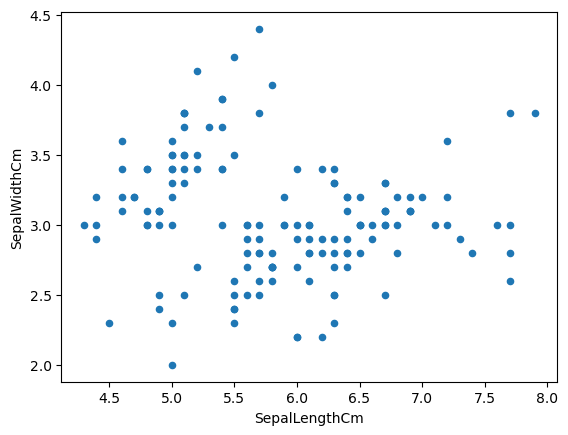

In [15]:
iris.plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm')

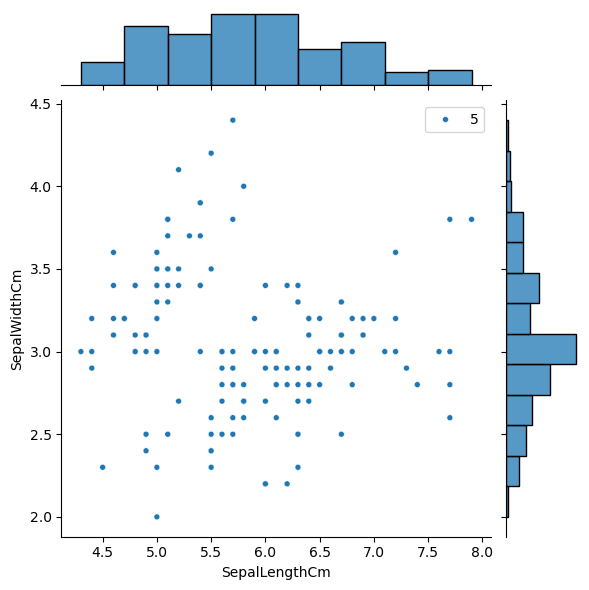

In [17]:
sns.jointplot(iris,x='SepalLengthCm',y='SepalWidthCm',size=5)

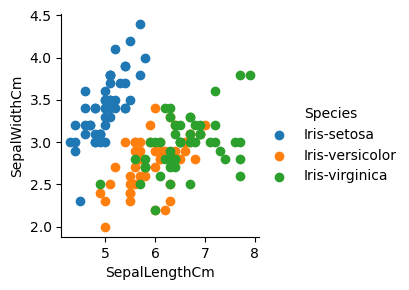

In [18]:
sns.FacetGrid(iris,hue='Species')\
    .map(plt.scatter,'SepalLengthCm','SepalWidthCm')\
    .add_legend()

<Axes: xlabel='Species', ylabel='SepalLengthCm'>

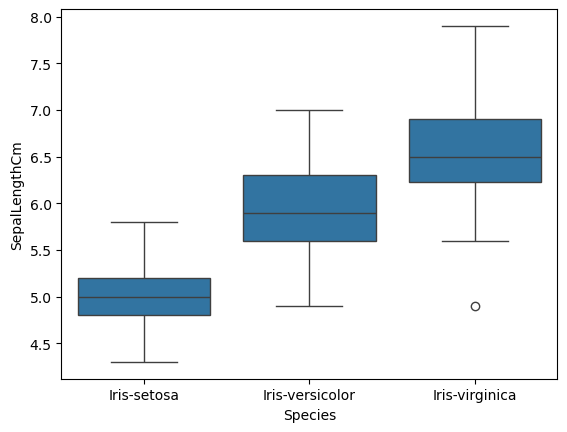

In [21]:
sns.boxplot(x='Species',y='SepalLengthCm',data=iris)

/var/folders/c6/1mq4g7t165x1k9x384n7wht40000gn/T/ipykernel_5008/2099253746.py:2: FutureWarning: Use "auto" to set automatic grayscale colors. From v0.14.0, "gray" will default to matplotlib's definition.
  ax=sns.stripplot(x='Species',y='SepalLengthCm',data=iris,jitter=True,edgecolor='gray')


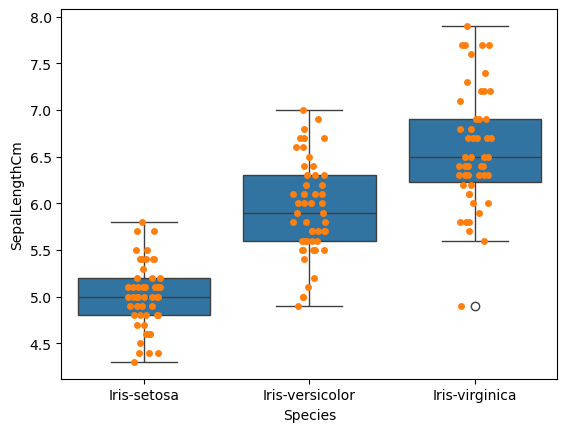

In [23]:
ax=sns.boxplot(x='Species',y='SepalLengthCm',data=iris)
ax=sns.stripplot(x='Species',y='SepalLengthCm',data=iris,jitter=True,edgecolor='gray')

<Axes: xlabel='Species', ylabel='SepalLengthCm'>

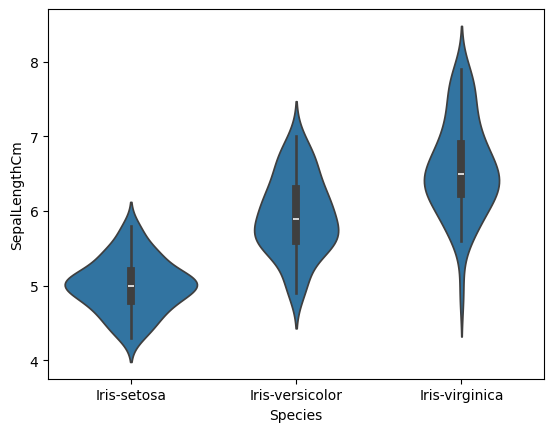

In [25]:
sns.violinplot(x='Species',y='SepalLengthCm',data=iris)

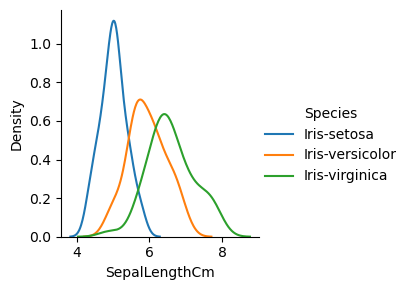

In [27]:
sns.FacetGrid(iris,hue='Species')\
    .map(sns.kdeplot,'SepalLengthCm')\
    .add_legend()

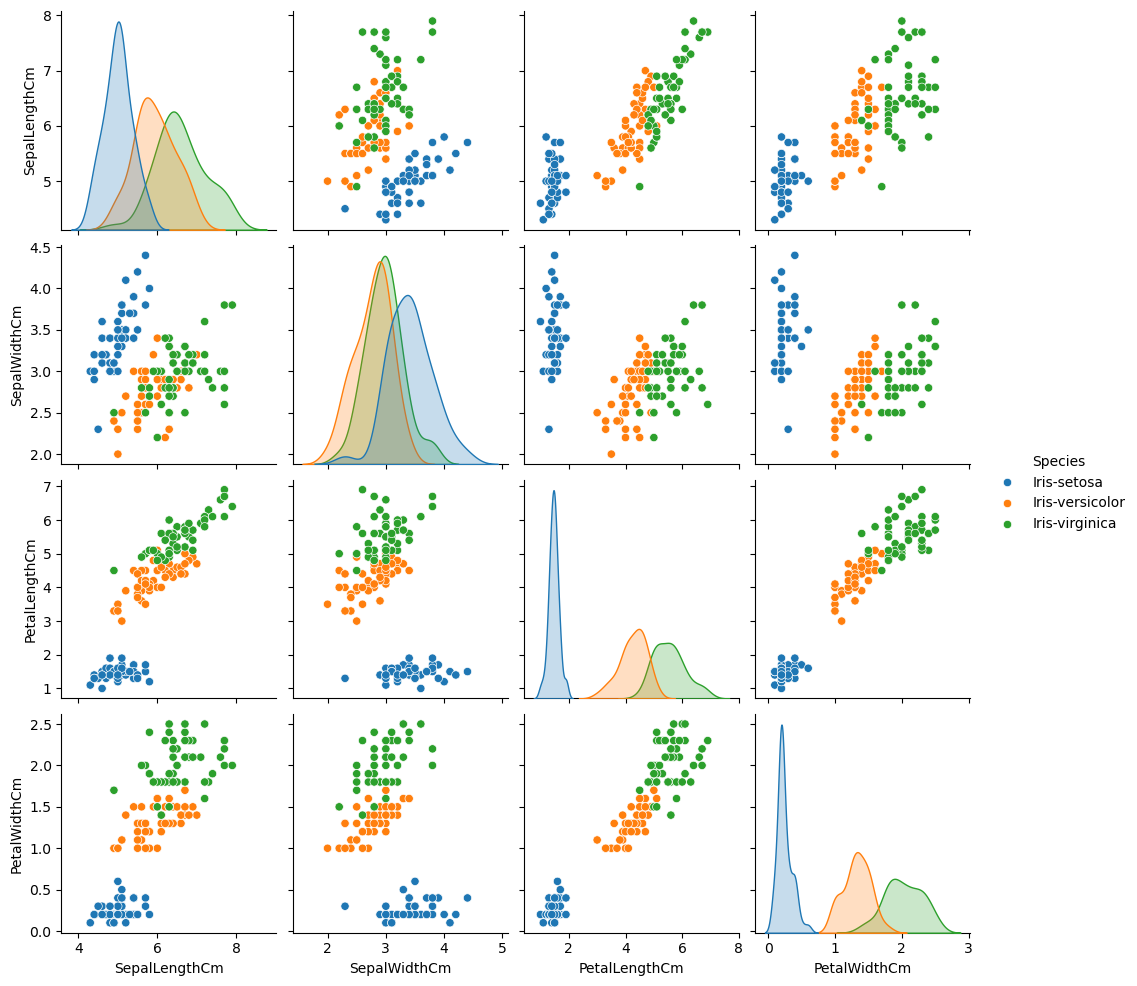

In [29]:
sns.pairplot(iris.drop(['Id'],axis=1),hue='Species')

array([[<Axes: title={'center': 'PetalLengthCm'}, xlabel='[Species]'>,
        <Axes: title={'center': 'PetalWidthCm'}, xlabel='[Species]'>],
       [<Axes: title={'center': 'SepalLengthCm'}, xlabel='[Species]'>,
        <Axes: title={'center': 'SepalWidthCm'}, xlabel='[Species]'>]],
      dtype=object)

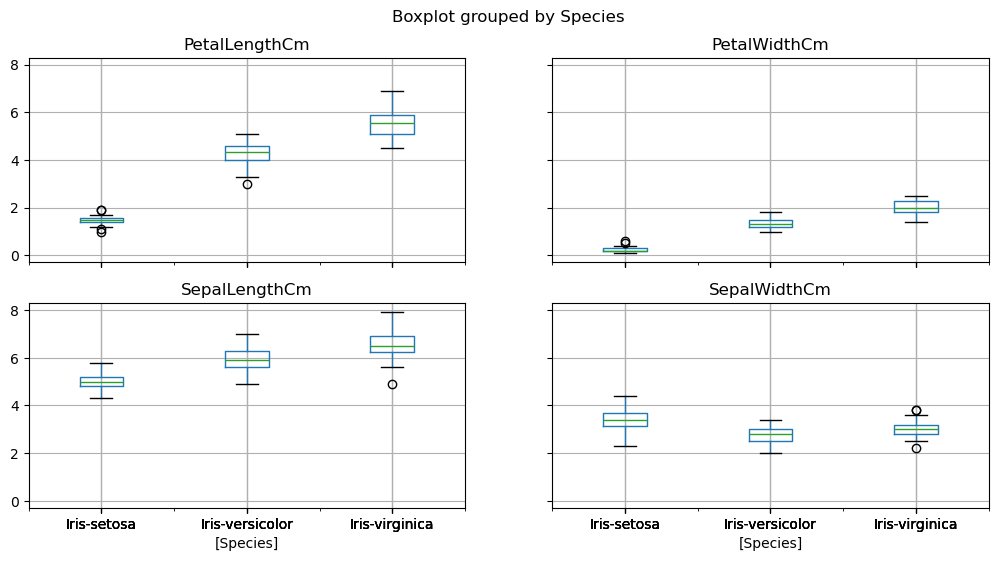

In [30]:
iris.drop('Id',axis=1).boxplot(by='Species',figsize=(12,6))

AttributeError: 'Figure' object has no attribute 'add'

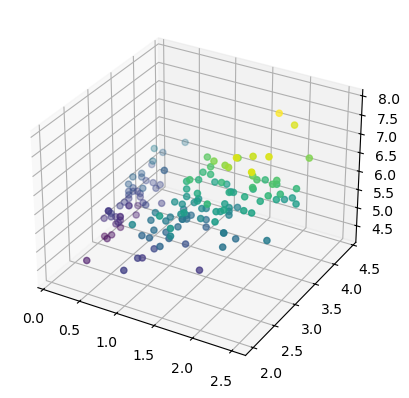

In [31]:
fig=plt.figure()
ax=fig.add_subplot(111,projection='3d')

scatter=ax.scatter(iris['PetalWidthCm'],iris['SepalWidthCm'],iris['SepalLengthCm'],c=iris['SepalLengthCm'],cmap='viridis')
# scatter=ax.scatter(iris['Species'],c=iris['Species'],cmap='viridis')

fig.add

In [ ]:
# iris=pd.get_dummies(iris,columns=['Species'],drop_first=True,dtype=int)

In [ ]:
iris.head()

In [58]:
iris.drop(['Id'],axis=1,inplace=True)

In [60]:
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


<Axes: >

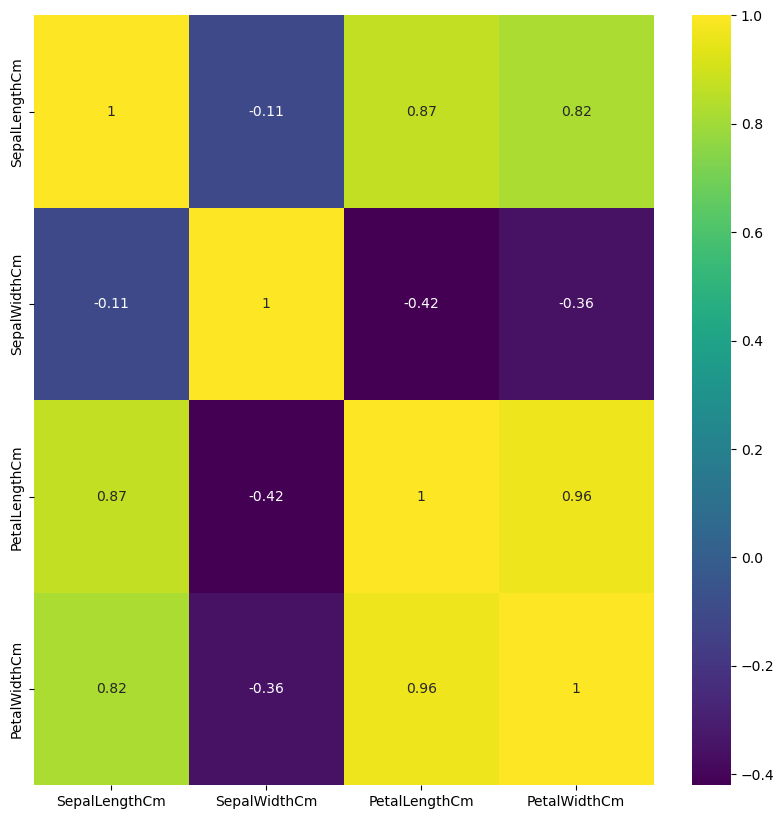

In [76]:
plt.figure(figsize=(10,10))
sns.heatmap(iris.drop('Species',axis=1).corr(),annot=True,cmap='viridis')

In [78]:
df_train,df_test=train_test_split(iris,test_size=0.2,train_size=0.8,random_state=100)

X_train=df_train
y_train=df_train.pop('Species')
X_test=df_test
y_test=df_test.pop('Species')


In [80]:
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)

y_pred=dt.predict(X_test)

print(f"{accuracy_score(y_pred,y_test)}")
# print(classification_report(y_test, y_pred, target_names=iris))



0.9666666666666667


In [82]:
rf=RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train,y_train)

y_pred=rf.predict(X_test)

print(f"{accuracy_score(y_pred,y_test)}")

0.9666666666666667


In [84]:
svm=SVC()
svm.fit(X_train,y_train)

y_pred=svm.predict(X_test)
print(f"score {accuracy_score(y_pred,y_test)}")

score 1.0
